# 94-775/95-865: More on PCA, Argsort
Author: Erick Rodriguez (erickger [at symbol] cmu.edu)

This demo is based on Mark Richardson's 2009 "Principle Component Analysis" notes and uses data he pulled from DEFRA on 1997 UK food consumption (grams/person/week). This dataset is also used as a nice illustrated example of PCA here:
http://setosa.io/ev/principal-component-analysis/

#### Creating the dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots
import numpy as np
import pandas as pd

# grams per person per week
food_data = np.array([[105, 103, 103, 66],
                      [245, 227, 242, 267],
                      [685, 803, 750, 586],
                      [147, 160, 122, 93],
                      [193, 235, 184, 209], 
                      [156, 175, 147, 139],
                      [720, 874, 566, 1033],
                      [253, 265, 171, 143],
                      [488, 570, 418, 355],
                      [198, 203, 220, 187],
                      [360, 365, 337, 334],
                      [1102, 1137, 957, 674],
                      [1472, 1582, 1462, 1494],
                      [57, 73, 53, 47],
                      [1374, 1256, 1572, 1506],
                      [375, 475, 458, 135],
                      [54, 64, 62, 41]])
row_labels = ['Cheese',
              'Carcass meat',
              'Other meat',
              'Fish',
              'Fats and oils',
              'Sugars',
              'Fresh potatoes',
              'Fresh Veg',
              'Other Veg',
              'Processed potatoes',
              'Processed Veg',
              'Fresh fruit',
              'Cereals',
              'Beverages',
              'Soft drinks',
              'Alcoholic drinks',
              'Confectionary']
column_labels = ['England', 'Wales', 'Scotland', 'N. Ireland']

#### Looking at the table with a dataframe

In [2]:
food_df = pd.DataFrame(food_data, columns=column_labels, index=row_labels)
food_df.head(20)

,England,Wales,Scotland,N. Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209
Sugars,156,175,147,139
Fresh potatoes,720,874,566,1033
Fresh Veg,253,265,171,143
Other Veg,488,570,418,355
Processed potatoes,198,203,220,187


#### Running PCA

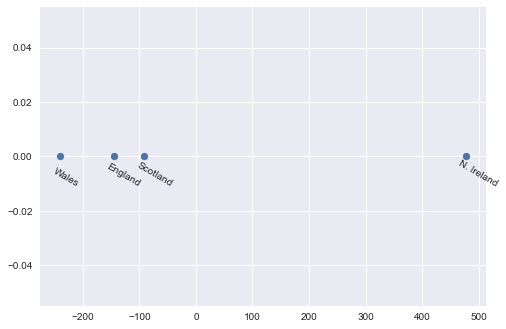

In [3]:
from sklearn.decomposition import PCA

# instantiate PCA class
single_dimension_pca = PCA(n_components=1)
# use our pca to fit and transform the whole dataset
single_dimension_food_data = single_dimension_pca.fit_transform(food_data.T)

# matplotlib doesn't have a built-in 1D scatter plot but we can
# just use a 2D scatter plot with y-axis values all set to 0
y_axis_all_zeros = np.zeros(len(single_dimension_food_data))
plt.scatter(single_dimension_food_data, y_axis_all_zeros)

for idx in range(len(single_dimension_food_data)):
    plt.annotate(column_labels[idx], (single_dimension_food_data[idx] - 15, y_axis_all_zeros[idx]-0.011), rotation=-30)

#### Explaining the results

For this we can plot the data

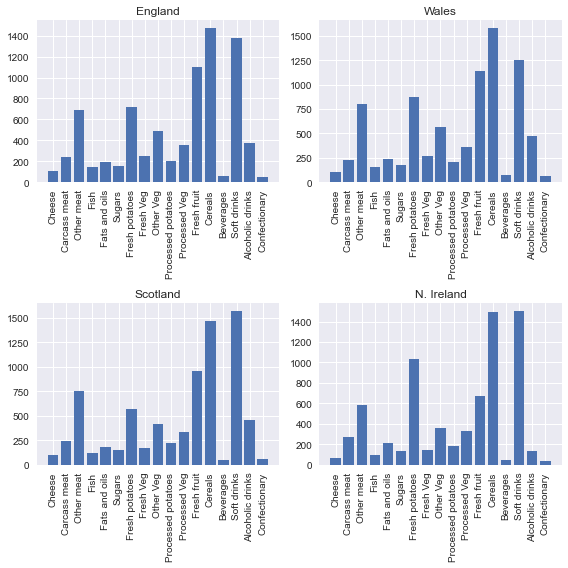

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))

ax1.bar(range(len(row_labels)), food_data[:, 0])
ax1.set_title(column_labels[0])
ax1.set_xticks(range(len(row_labels)))
ax1.set_xticklabels(row_labels, rotation=90)

ax2.bar(range(len(row_labels)), food_data[:, 1])
ax2.set_title(column_labels[1])
ax2.set_xticks(range(len(row_labels)))
ax2.set_xticklabels(row_labels, rotation=90)

ax3.bar(range(len(row_labels)), food_data[:, 2])
ax3.set_title(column_labels[2])
ax3.set_xticks(range(len(row_labels)))
ax3.set_xticklabels(row_labels, rotation=90)

ax4.bar(range(len(row_labels)), food_data[:, 3])
ax4.set_title(column_labels[3])
ax4.set_xticks(range(len(row_labels)))
ax4.set_xticklabels(row_labels, rotation=90)

plt.tight_layout()
plt.show()

Some reasons?

- Northern Ireland eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks
- It turns out that Northern Ireland is the only of the four countries not on the island of Great Britain

#### Using PCA with 2 components instead of two

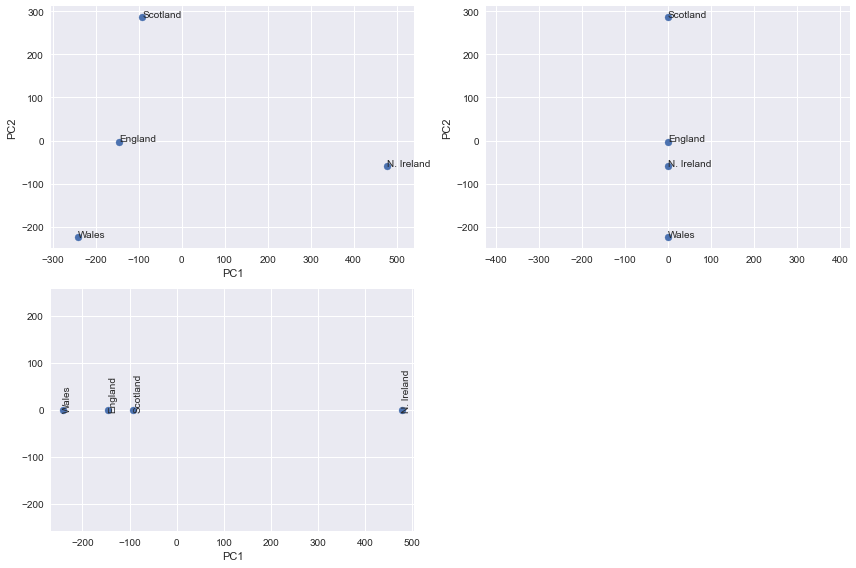

In [5]:
# similarly we define a PCA with two components
two_dimension_pca = PCA(n_components=2)
two_dimension_food_data = two_dimension_pca.fit_transform(food_data.T)

# Notice that this is another way of plotting subplots
# ----------------------------------------------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1) #upper left figure
plt.scatter(two_dimension_food_data[:,0], two_dimension_food_data[:,1])
for idx in range(len(two_dimension_food_data)):
    plt.annotate(column_labels[idx], (two_dimension_food_data[:,0][idx], two_dimension_food_data[:,1][idx]), rotation=0)
plt.axis('equal')
plt.xlabel("PC1")
plt.ylabel("PC2")

# note this is the first PC, and it is completely the same with the one with only one PC.
plt.subplot(2,2,3) #lower left figure
plt.scatter(two_dimension_food_data[:,0], y_axis_all_zeros)
for idx in range(len(two_dimension_food_data)):
    plt.annotate(column_labels[idx], (two_dimension_food_data[:,0][idx], y_axis_all_zeros[idx]), rotation=90)
plt.axis('equal')
plt.xlabel("PC1")

plt.subplot(2,2,2) #upper right figure
plt.scatter(y_axis_all_zeros, two_dimension_food_data[:,1])
for idx in range(len(two_dimension_food_data)):
    plt.annotate(column_labels[idx], (y_axis_all_zeros[idx], two_dimension_food_data[:,1][idx]), rotation=0)
plt.axis('equal')
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

#### PCA Results

In [6]:
print('Data points for decomposition into 1 dimension:\n')
print(single_dimension_food_data)
print('\n\nData points for decomposition into 2 dimensions:\n')
print(two_dimension_food_data)

Data points for decomposition into 1 dimension:

[[-144.99315218]
 [-240.52914764]
 [ -91.869339  ]
 [ 477.39163882]]


Data points for decomposition into 2 dimensions:

[[-144.99315218   -2.53299944]
 [-240.52914764 -224.64692488]
 [ -91.869339    286.08178613]
 [ 477.39163882  -58.90186182]]


In [7]:
print('The explained ratio for decomposition into 1 dimension is', single_dimension_pca.explained_variance_ratio_[0])
print('\nThe explained ratio for decomposition into 2 dimensions is', two_dimension_pca.explained_variance_ratio_[0], 
     'and', two_dimension_pca.explained_variance_ratio_[1])

The explained ratio for decomposition into 1 dimension is 0.6744434639658383

The explained ratio for decomposition into 2 dimensions is 0.6744434639658383 and 0.2905247457687653


#### Differences among fit, transform, and fit_transform

When we fit the data before by doing `single_dimension_pca.fit_transform(food_data.T)` we actually runned two methods `fit()` and `transform()`. 

Usually this is really helpfull when we create machine learning models because we can fit the model and then inject new data to be "transformed" or predicted. That is `fit()` fits the model to the data we sent as a parameter.

In [8]:
one_dim_pca = PCA(n_components=1)
one_dim_pca_fitted_model = single_dimension_pca.fit(food_data.T)

We can look at results by using our original data

In [9]:
one_dim_pca_results = one_dim_pca_fitted_model.transform(food_data.T)
print(one_dim_pca_results)

[[-144.99315218]
 [-240.52914764]
 [ -91.869339  ]
 [ 477.39163882]]


In [10]:
one_dim_pca_fitted_model.transform([food_data[:, 0], food_data[:, 1]])

array([[-144.99315218],
       [-240.52914764]])

However, we could actually plug in new data that we didn't fit within the PCA model (for example, if we collected the 17 measurements for Adelaide, we could use it with transform as well, etc).

In [11]:
# Let's imagine this is the data for Adelaide
adelaide_data = np.random.uniform(low=100, high=1500, size=(17,))
print(adelaide_data)

[ 484.47359517 1003.78728718  204.1914698  1475.50723778  722.03408653
  711.97483101 1499.54233132 1120.25632558  805.87393719  148.20492434
 1463.63024046  782.35846181  598.6838294  1498.31158392  732.81067896
  918.6504853  1360.41649568]


In [12]:
# Now let's see what are the results on this
print("The results for using our moodel with Adelaide's dataset is: ", 
      one_dim_pca_fitted_model.transform([adelaide_data])[0][0])

The results for using our moodel with Adelaide's dataset is:  -310.45684057498056


#### Interpretation

How do we interpret the low-dimensional representation? Why is North Ireland so far away from the other points? One way to try to answer this question is to first look at what features (i.e., what specific food/drink items) are being assigned high weight by PCA:

In [13]:
print(single_dimension_pca.components_)  # index 0 is for the 1st principal component

[[-0.05695538  0.04792763 -0.25891666 -0.08441498 -0.00519362 -0.03762098
   0.40140206 -0.15184994 -0.24359373 -0.02688623 -0.03648827 -0.6326409
  -0.04770286 -0.02618776  0.23224414 -0.46396817 -0.0296502 ]]


In [14]:
print(two_dimension_pca.components_[0])
print(two_dimension_pca.components_[1])

[-0.05695538  0.04792763 -0.25891666 -0.08441498 -0.00519362 -0.03762098
  0.40140206 -0.15184994 -0.24359373 -0.02688623 -0.03648827 -0.6326409
 -0.04770286 -0.02618776  0.23224414 -0.46396817 -0.0296502 ]
[ 0.01601285  0.01391582 -0.01533114 -0.05075495 -0.09538866 -0.0430217
 -0.71501708 -0.14490027 -0.22545092  0.04285076 -0.0454518  -0.17774074
 -0.21259968 -0.03056054  0.55512431  0.11353652  0.00594992]


In [15]:
importance_idx = np.argsort(-abs(two_dimension_pca.components_[0]))
# print row_labels in descending importance order
print(np.asarray(row_labels)[importance_idx])
# if interested, you could refer to the bar chart to verify

['Fresh fruit' 'Alcoholic drinks' 'Fresh potatoes' 'Other meat'
 'Other Veg' 'Soft drinks' 'Fresh Veg' 'Fish' 'Cheese' 'Carcass meat'
 'Cereals' 'Sugars' 'Processed Veg' 'Confectionary' 'Processed potatoes'
 'Beverages' 'Fats and oils']


Importantly, how PCA (that has already been fitted) actually projects a data point to 1D is to take a weighted combination using the above weights (although it first subtracts off the feature means). Specifically, here are the calculations for England and Wales:

In [16]:
print('Single dimension PCA means:\n', single_dimension_pca.mean_)
print('\nTwo dimensions PCA means:\n', two_dimension_pca.mean_)

Single dimension PCA means:
 [  94.25  245.25  706.    130.5   205.25  154.25  798.25  208.    457.75
  202.    349.    967.5  1502.5    57.5  1427.    360.75   55.25]

Two dimensions PCA means:
 [  94.25  245.25  706.    130.5   205.25  154.25  798.25  208.    457.75
  202.    349.    967.5  1502.5    57.5  1427.    360.75   55.25]


In [17]:
np.inner(single_dimension_pca.components_[0], food_data[:, 0] - single_dimension_pca.mean_)

-144.99315218207676

In [18]:
np.inner(single_dimension_pca.components_[0],
         food_data[:, 1] - single_dimension_pca.mean_)

-240.52914763517666

In [19]:
np.inner(two_dimension_pca.components_[1],
         food_data[:, 0] - two_dimension_pca.mean_)

-2.5329994370406337

In [20]:
np.inner(two_dimension_pca.components_[1],
         food_data[:, 1] - two_dimension_pca.mean_)

-224.64692488126894

#### Argsort

In the previous lecture we saw the `sorted` function; now we introduce numpy's `argsort`, which does *not* return the sorted list but instead returns the rearranged indices that would sort the list (put another way, it returns rankings)

Going back to our previous exmaple with the food data, in PCA, weights with larger absolute value correspond to features that lead to the largest spread along the projected 1D axis. Here's some code to rank the weights by largest absolute value to smallest absolute value:

In [21]:
abs_1PC_weights = np.abs(single_dimension_pca.components_[0])

ranking_abs_1PC_weights = np.argsort(-abs_1PC_weights) # use negative to get largest to smallest

# Printing out the food items from highest to lowest absolute value weight
print("{0:5} {1:20} {2:10}".format('Index', 'Food', 'Absolute Value'))
print("{0:5} {1:20} {2:22}".format('-----', '--------------------', '----------------------'))
for index in ranking_abs_1PC_weights:
    print("{0:5} {1:20} {2:22}".format(str(index), row_labels[index], str(single_dimension_pca.components_[0][index])))

Index Food                 Absolute Value
----- -------------------- ----------------------
11    Fresh fruit          -0.6326408978722377   
15    Alcoholic drinks     -0.4639681679767063   
6     Fresh potatoes       0.40140206029624825   
2     Other meat           -0.25891665833612104  
8     Other Veg            -0.24359372899027432  
14    Soft drinks          0.2322441404728945    
7     Fresh Veg            -0.15184994156230222  
3     Fish                 -0.08441498252508359  
0     Cheese               -0.05695537978568534  
1     Carcass meat         0.04792762813468509   
12    Cereals              -0.04770285837364884  
5     Sugars               -0.03762098283940194  
10    Processed Veg        -0.03648826911159385  
16    Confectionary        -0.029650201087993867 
9     Processed potatoes   -0.026886232536746928 
13    Beverages            -0.026187755908533446 
4     Fats and oils        -0.0051936226600476955


#### Using argsort with our example

In [22]:
single_dimension_food_data

array([[-144.99315218],
       [-240.52914764],
       [ -91.869339  ],
       [ 477.39163882]])

In [23]:
ranking_of_region_from_large_to_small_1st_component = \
np.argsort(-(single_dimension_food_data[:,0] - np.average(single_dimension_food_data[:,0])))

for index in ranking_of_region_from_large_to_small_1st_component:
    print(column_labels[index], ":", single_dimension_food_data[index,0])

N. Ireland : 477.3916388161171
Scotland : -91.86933899886361
England : -144.99315218207673
Wales : -240.52914763517657


#### Using argsort with a dictionary

In [24]:
from collections import Counter
dict_fruits = {"apple":10, "pear":7, "banana":11, "grape":20, "orange":12}
stock = Counter(dict_fruits)

In [25]:
sorted(stock.items(), reverse=True, key = lambda x:x[1])

[('grape', 20), ('orange', 12), ('banana', 11), ('apple', 10), ('pear', 7)]

In [26]:
np.dot(-1, [1,2])

array([-1, -2])

**Task:** Try to return a list in descending order based on the stock with argsort.

Useful methods:
- Counter.keys()
- Counter.values()

In [27]:
sorted_index = np.argsort(np.dot(-1, list(stock.values())))

# another way to do it in desecending order
# sorted_index = np.argsort(list(stock.values()))[::-1]

sorted_stock_keys = np.array(list(stock.keys()))
sorted_stock_keys[sorted_index]

array(['grape', 'orange', 'banana', 'apple', 'pear'], dtype='<U6')

#### Using argsort with matrices

Suppose we have a list of fruits with their respective prices. These prices correspond to 4 states in the Australia.

**Tasks:** 
- Give a list of the fruits from the most expensive to the cheapest. This thinking that each row correspond to one state.
- Now, do the same, but now think that the states are actually the columns of the matrix.

In [28]:
fruits = np.array([['apple', 'banana', 'kiwi', 'passionfruit'], 
                   ['mango', 'orange', 'mandarin', 'citrus'], 
                   ['watermelon', 'rockmelon', 'papaya', 'grape'], 
                   ['plum', 'peach', 'apricot', 'lychee']])

fruit_prices = np.array([[5,3,12,1],
                         [12,5,3,9],
                         [2,6,1,19],
                         [1,5,4,14]])

In [29]:
#return index matrix sorting by column
print(np.argsort(fruit_prices, axis=0))
print()

#return index matrix sorting by row
print(np.argsort(fruit_prices, axis=1))

[[3 0 2 0]
 [2 1 1 1]
 [0 3 3 3]
 [1 2 0 2]]

[[3 1 0 2]
 [2 1 3 0]
 [2 0 1 3]
 [0 2 1 3]]


In [30]:
sorted_fruits = np.argsort(fruit_prices, axis=1)
sorted_fruits

array([[3, 1, 0, 2],
       [2, 1, 3, 0],
       [2, 0, 1, 3],
       [0, 2, 1, 3]])

In [31]:
# To show the results of this in terms of the labels you can do as follow
[print(fruit[sorted_fruits[idx]]) for idx,fruit in enumerate(fruits)]

['passionfruit' 'banana' 'apple' 'kiwi']
['mandarin' 'orange' 'citrus' 'mango']
['papaya' 'watermelon' 'rockmelon' 'grape']
['plum' 'apricot' 'peach' 'lychee']


[None, None, None, None]

In [32]:
# You can also use 
np.take_along_axis(fruits, sorted_fruits, axis=1)

array([['passionfruit', 'banana', 'apple', 'kiwi'],
       ['mandarin', 'orange', 'citrus', 'mango'],
       ['papaya', 'watermelon', 'rockmelon', 'grape'],
       ['plum', 'apricot', 'peach', 'lychee']], dtype='<U12')

**Exercise2 [From demo Co-Occurrence Analysis for Finding Possible Relationships]**

Output the rankings of each pair given the lists of strings for rows and columns

In [33]:
#Get the PMI table and lists of names and companies
np.set_printoptions(precision=5, suppress=True)
co_occurrence_table = np.array([[1500, 1000, 20000],
                                [1000, 50, 50],
                                [30, 700, 10]])
joint_prob_table = co_occurrence_table / co_occurrence_table.sum()

people_prob = joint_prob_table.sum(axis=1)
company_prob = joint_prob_table.sum(axis=0)
joint_prob_table_if_people_and_companies_were_indep = np.outer(people_prob, company_prob)
PMI = np.log2(joint_prob_table / joint_prob_table_if_people_and_companies_were_indep)
names = ['Elon Musk', 'Sundar Pichai', 'Lisa Su']
companies = ['Alphabet', 'AMD', 'Tesla']
print(PMI)

[[-0.64077 -0.69395  0.10908]
 [ 3.12862 -0.66153 -4.18042]
 [-1.35837  3.71773 -5.93045]]


In [34]:
# Do it with sorted
PMI_name_company_tuples = [(PMI[row_idx, col_idx], names[row_idx], companies[col_idx]) for row_idx in range(PMI.shape[0]) for col_idx in range(PMI.shape[1])]
sorted(PMI_name_company_tuples, reverse=True)  # without using itemgetter/lambda, sorts based on index 0

[(3.7177319921974163, 'Lisa Su', 'AMD'),
 (3.1286163542694836, 'Sundar Pichai', 'Alphabet'),
 (0.10908256065923522, 'Elon Musk', 'Tesla'),
 (-0.6407707175891003, 'Elon Musk', 'Alphabet'),
 (-0.6615292777558972, 'Sundar Pichai', 'AMD'),
 (-0.693950755448275, 'Elon Musk', 'AMD'),
 (-1.3583709868883753, 'Lisa Su', 'Alphabet'),
 (-4.18042405653575, 'Sundar Pichai', 'Tesla'),
 (-5.930445803527402, 'Lisa Su', 'Tesla')]

In [35]:
# do it with argsort
sorted_idx = np.argsort(PMI.flatten())
names_list = [t[1] for t in PMI_name_company_tuples]
companies_list = [t[2] for t in PMI_name_company_tuples]
sorted_idx = np.argsort(PMI.flatten())
print("{0:20} {1:10} {2:20}".format('Company', 'Name', 'PMI'))
print("{0:20} {1:10} {2:20}".format('--------------------', '----------', '--------------------'))
for idx in sorted_idx[::-1]:
    print("{0:20} {1:10} {2:20}".format(names_list[idx], companies_list[idx], str(PMI.flatten()[idx])))

Company              Name       PMI                 
-------------------- ---------- --------------------
Lisa Su              AMD        3.7177319921974163  
Sundar Pichai        Alphabet   3.1286163542694836  
Elon Musk            Tesla      0.10908256065923522 
Elon Musk            Alphabet   -0.6407707175891003 
Sundar Pichai        AMD        -0.6615292777558972 
Elon Musk            AMD        -0.693950755448275  
Lisa Su              Alphabet   -1.3583709868883753 
Sundar Pichai        Tesla      -4.18042405653575   
Lisa Su              Tesla      -5.930445803527402  
